<a href="https://colab.research.google.com/github/shreyas074/BigInteger/blob/main/Mini_Project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
 99% 780M/786M [00:06<00:00, 60.4MB/s]
100% 786M/786M [00:06<00:00, 124MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer9-classesisic.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

IMPORTING LIBRARIES

In [53]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.resnet import preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras import activations
import numpy as np
from glob import glob

RESIZING ALL IMAGES

In [54]:
IMAGE_SIZE = [224, 224]

SETTING TRAINING AND VALIDATION PATH

In [55]:
train_path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
valid_path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

IMPORTING VGG16

In [56]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [57]:
for layer in vgg16.layers:
    layer.trainable = False

In [58]:
folders=glob('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*')


In [59]:
folders

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma']

In [60]:
x = Flatten()(vgg16.output)
len(folders)

9

In [75]:
model = Sequential()
model.add(vgg16)
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_4 (Bat  (None, 7, 7, 512)         2048      
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 512)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 4608)              0         
                                                                 
 dense_21 (Dense)            (None, 1024)              4719616   
                                                                 
 dropout_9 (Dropout)         (None, 1024)             

In [77]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
  run_eagerly=True
)


In [78]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [79]:
training_set = train_datagen.flow_from_directory('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [80]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


<ipython-input-80-ce52b4c29017>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
70/70 [==============================] - 64s 885ms/step - loss: 1.9894 - accuracy: 0.2921 - val_loss: 2.0062 - val_accuracy: 0.2034
Epoch 2/20
70/70 [==============================] - 62s 871ms/step - loss: 1.6323 - accuracy: 0.4118 - val_loss: 1.8043 - val_accuracy: 0.3814
Epoch 3/20
70/70 [==============================] - 61s 873ms/step - loss: 1.4924 - accuracy: 0.4551 - val_loss: 1.7691 - val_accuracy: 0.2881
Epoch 4/20
70/70 [==============================] - 62s 879ms/step - loss: 1.3682 - accuracy: 0.5011 - val_loss: 1.6220 - val_accuracy: 0.4153
Epoch 5/20
70/70 [==============================] - 62s 875ms/step - loss: 1.2906 - accuracy: 0.5346 - val_loss: 1.7481 - val_accuracy: 0.3475
Epoch 6/20
70/70 [==============================] - 62s 887ms/step - loss: 1.2044 - accuracy: 0.5681 - val_loss: 1.7530 - val_accuracy: 0.3559
Epoch 7/20
70/70 [==============================] - 62s 880ms/step - loss: 1.1366 - accuracy: 0.5837 - val_loss: 1.6136 - val_accuracy: 0.3983

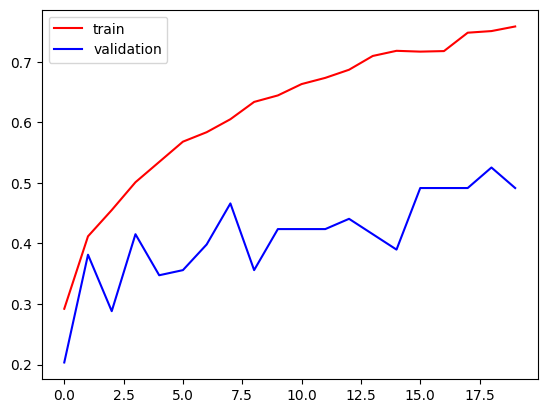

In [82]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

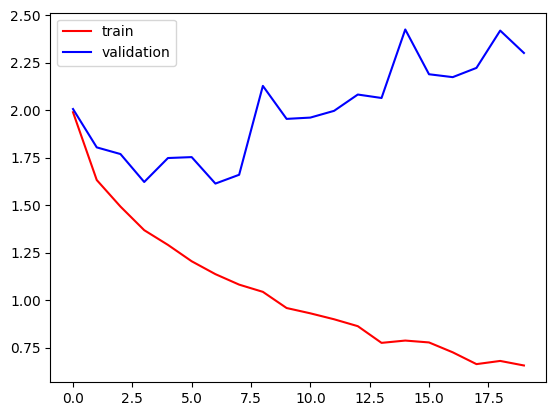

In [83]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()